In [1]:
import torch
import h5py
import numpy as np
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import pickle
from sklearn.preprocessing import normalize
from scipy.sparse import lil_matrix, csr_matrix, hstack
from tqdm import tqdm
import math

In [2]:
# 변수 선언 block
train_rec_file_list = ["./final_recs/Chanho_recs/train_recs/CF_rec_clf_dim_64.pickle",
                       "./final_recs/Chanho_recs/train_recs/Graph_rec_clf_1_8_depth_3.pickle",
                       "./final_recs/Chanho_recs/train_recs/Graph_rec_clf_1_8_depth_1.pickle",
                       "./final_recs/Junwon_recs/inference_train_classification_DNN_fc_layer_sizes_2048-1024-512-256_batch_16_seed_0.pkl",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncFC_PoolPMA_CplNone_NumEnc7_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncFC_PoolPMA_CplNone_NumEnc9_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncFC_PoolPMA_CplNone_NumEnc10_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncFC_PoolPMA_CplPooled_NumEnc5_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncFC_PoolPMA_CplPooled_NumEnc8_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplNone_NumEnc8_NumDec3_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc2_NumDec0_Hid512_Emb512_Ind8.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec0_Hid512_Emb512_Ind16.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec3_Hid512_Emb512_Ind6.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec3_Hid512_Emb512_Ind7.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec3_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc4_NumDec3_Hid512_Emb512_Ind6.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc6_NumDec0_Hid512_Emb512_Ind29.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_SA_PoolPMA_CplEncoded_NumEnc4_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_SA_PoolPMA_CplEncoded_NumEnc8_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_SA_PoolPMA_CplNone_NumEnc2_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_SA_PoolPMA_CplNone_NumEnc3_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_train_clf_EncHYBRID_SA_PoolPMA_CplNone_NumEnc10_NumDec1_Hid512_Emb512_Ind10.pickle",
                      ]

valid_rec_file_list = ["./final_recs/Chanho_recs/valid_recs/CF_rec_clf_dim_64.pickle",
                       "./final_recs/Chanho_recs/valid_recs/Graph_rec_clf_1_8_depth_3.pickle",
                       "./final_recs/Chanho_recs/valid_recs/Graph_rec_clf_1_8_depth_1.pickle",
                       "./final_recs/Junwon_recs/inference_valid_clf_classification_DNN_fc_layer_sizes_2048-1024-512-256_batch_16_seed_0.pkl",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncFC_PoolPMA_CplNone_NumEnc7_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncFC_PoolPMA_CplNone_NumEnc9_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncFC_PoolPMA_CplNone_NumEnc10_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncFC_PoolPMA_CplPooled_NumEnc5_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncFC_PoolPMA_CplPooled_NumEnc8_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplNone_NumEnc8_NumDec3_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc2_NumDec0_Hid512_Emb512_Ind8.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec0_Hid512_Emb512_Ind16.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec3_Hid512_Emb512_Ind6.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec3_Hid512_Emb512_Ind7.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc3_NumDec3_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc4_NumDec3_Hid512_Emb512_Ind6.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_PoolPMA_CplPooled_NumEnc6_NumDec0_Hid512_Emb512_Ind29.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_SA_PoolPMA_CplEncoded_NumEnc4_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_SA_PoolPMA_CplEncoded_NumEnc8_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_SA_PoolPMA_CplNone_NumEnc2_NumDec0_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_SA_PoolPMA_CplNone_NumEnc3_NumDec1_Hid512_Emb512_Ind10.pickle",
                       "./final_recs/Hanseul_recs/rec_CCNet_valid_clf_EncHYBRID_SA_PoolPMA_CplNone_NumEnc10_NumDec1_Hid512_Emb512_Ind10.pickle",
                      ]

train_path = './Container/train'

valid_path = './Container/valid_clf'

state_dict_save_path = "./ensemble_model/ensemble_model_best_clf.pt"

loss_fig_path = "./ensemble_model/ensemble_clf_loss.png"
acc_fig_path = "./ensemble_model/ensemble_clf_acc.png"

epochs = 20

In [3]:
class RecDataset(Dataset):
    def __init__(self, recs_list, answer_dict, query_num, item_num, transform=None, target_transform=None):
        # rec_matrix = [query num, model_num, item_num]
        self.rec_matrix = []
        for i in range(query_num):
            self.rec_matrix.append(lil_matrix((len(recs_list), item_num)))
        for i, recs in enumerate(recs_list):
            for query in tqdm(recs.keys()):
                rec = recs[query]
                rec_items, rec_scores = [rec_ for rec_, score in rec], [score for rec_, score in rec]
                rec_scores = normalize(np.array(rec_scores)[:,np.newaxis], axis=0).ravel()
                for item, score in zip(rec_items, rec_scores):
                    self.rec_matrix[query][i, item] = score
        self.labels = answer_dict
        self.transform = transform
        self.target_transform = target_transform
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

    def __len__(self):
        return len(self.rec_matrix)

    def __getitem__(self, idx):
        rec_matrix = self.rec_matrix[idx].toarray()
        label = self.labels[idx]
        if self.transform:
            rec_matrix = self.transform(rec_matrix).to(self.device)
        if self.target_transform:
            label = self.target_transform(label)
        return rec_matrix.to(self.device), label.to(self.device)

In [4]:
class Network(nn.Module):
    def __init__(self, model_len, k=10):
        super(Network, self).__init__()
        self.w1 = torch.nn.Parameter(torch.rand(k, model_len))
        self.w2 = torch.nn.Parameter(torch.rand(1, k))
        
    def forward(self, x):
        #import ipdb; ipdb.set_trace()
        x = x.float()
        x = torch.einsum('nm, bmp -> bnp', self.w1, x)
        x = torch.einsum('nm, bmp -> bnp', self.w2, x).squeeze(1)
        return x

In [5]:
recs_list = []
for rec_file in train_rec_file_list:
    with open(rec_file, 'rb') as f:
        recs = pickle.load(f)
        recs_list.append(recs)

query_num = len(recs_list[0])
item_num = 20

h5f_train = h5py.File(train_path, 'r')
answer = h5f_train['labels_int_enc'][:].astype(np.int64)
h5f_train.close()

answer_dict = {}
for i, ans in enumerate(answer):
    answer_dict[i] = ans

train_data = RecDataset(recs_list, answer_dict, query_num, item_num, transform=torch.Tensor, target_transform=torch.tensor)
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
###############

recs_list = []
for rec_file in valid_rec_file_list:
    with open(rec_file, 'rb') as f:
        recs = pickle.load(f)
        recs_list.append(recs)

query_num = len(recs_list[0])
item_num = 20

h5f_valid = h5py.File(valid_path, 'r')
answer = h5f_valid['labels_int_enc'][:].astype(np.int64)
h5f_valid.close()

answer_dict = {}
for i, ans in enumerate(answer):
    answer_dict[i] = ans

test_data = RecDataset(recs_list, answer_dict, query_num, item_num, transform=torch.Tensor, target_transform=torch.tensor)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

100%|███████████████████████████████████████████████████████████████████████████| 7848/7848 [00:00<00:00, 11661.64it/s]


In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Network(len(train_rec_file_list), k=10).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    total_loss = 0
    for batch, (X, y) in tqdm(enumerate(dataloader),total=len(dataloader)):
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * int(X.size(0))
    avg_loss = total_loss / size
    print(f"Train loss: {avg_loss:>7f}")
    return avg_loss
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in tqdm(dataloader):
            pred = model(X)
            test_loss += loss_fn(pred, y).item() * int(X.size(0))
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.2f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, correct


train_loss_lst = []
test_loss_lst = []
test_acc_lst = []
min_test_acc = 0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loss, test_acc = test_loop(test_dataloader, model, loss_fn)
    train_loss_lst.append(train_loss)
    test_loss_lst.append(test_loss)
    test_acc_lst.append(test_acc)
    if test_acc >= min_test_acc:
        print("save")
        min_test_acc = test_acc
        torch.save(model.state_dict(), state_dict_save_path)
print("Done!")

Epoch 1
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:13<00:00, 27.90it/s]


Train loss: 2.149754


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 69.56it/s]


Test Error: 
 Accuracy: 78.52%, Avg loss: 5.453193 

save
Epoch 2
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 61.77it/s]


Train loss: 1.888761


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 70.24it/s]


Test Error: 
 Accuracy: 78.50%, Avg loss: 4.786371 

Epoch 3
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:06<00:00, 60.93it/s]


Train loss: 1.651535


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 67.18it/s]


Test Error: 
 Accuracy: 78.50%, Avg loss: 4.180140 

Epoch 4
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:06<00:00, 59.95it/s]


Train loss: 1.435571


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 69.18it/s]


Test Error: 
 Accuracy: 78.49%, Avg loss: 3.626777 

Epoch 5
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:06<00:00, 60.06it/s]


Train loss: 1.236494


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 65.32it/s]


Test Error: 
 Accuracy: 78.52%, Avg loss: 3.113343 

save
Epoch 6
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:06<00:00, 59.52it/s]


Train loss: 1.051240


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 66.77it/s]


Test Error: 
 Accuracy: 78.47%, Avg loss: 2.629576 

Epoch 7
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:06<00:00, 60.72it/s]


Train loss: 0.877043


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 66.15it/s]


Test Error: 
 Accuracy: 78.43%, Avg loss: 2.171976 

Epoch 8
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:04<00:00, 74.33it/s]


Train loss: 0.712615


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 87.36it/s]


Test Error: 
 Accuracy: 78.41%, Avg loss: 1.742200 

Epoch 9
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 66.93it/s]


Train loss: 0.558862


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 69.02it/s]


Test Error: 
 Accuracy: 78.40%, Avg loss: 1.337549 

Epoch 10
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 61.64it/s]


Train loss: 0.426056


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 72.02it/s]


Test Error: 
 Accuracy: 78.43%, Avg loss: 1.017468 

Epoch 11
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 62.17it/s]


Train loss: 0.358412


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 71.97it/s]


Test Error: 
 Accuracy: 78.45%, Avg loss: 0.915360 

Epoch 12
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 62.39it/s]


Train loss: 0.345051


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 66.92it/s]


Test Error: 
 Accuracy: 78.44%, Avg loss: 0.903639 

Epoch 13
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 61.72it/s]


Train loss: 0.337754


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 69.02it/s]


Test Error: 
 Accuracy: 78.49%, Avg loss: 0.904932 

Epoch 14
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 62.37it/s]


Train loss: 0.330916


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 70.53it/s]


Test Error: 
 Accuracy: 78.58%, Avg loss: 0.904290 

save
Epoch 15
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 62.93it/s]


Train loss: 0.324433


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 70.47it/s]


Test Error: 
 Accuracy: 78.54%, Avg loss: 0.909595 

Epoch 16
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 62.13it/s]


Train loss: 0.318350


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 70.37it/s]


Test Error: 
 Accuracy: 78.44%, Avg loss: 0.910853 

Epoch 17
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 62.37it/s]


Train loss: 0.312697


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 70.73it/s]


Test Error: 
 Accuracy: 78.50%, Avg loss: 0.910842 

Epoch 18
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 62.54it/s]


Train loss: 0.307451


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 69.37it/s]


Test Error: 
 Accuracy: 78.44%, Avg loss: 0.917395 

Epoch 19
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 61.36it/s]


Train loss: 0.302590


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 69.77it/s]


Test Error: 
 Accuracy: 78.52%, Avg loss: 0.917063 

Epoch 20
-------------------------------


100%|████████████████████████████████████████████████████████████████████████████████| 368/368 [00:05<00:00, 62.46it/s]


Train loss: 0.298098


100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:01<00:00, 70.13it/s]

Test Error: 
 Accuracy: 78.45%, Avg loss: 0.921284 

Done!


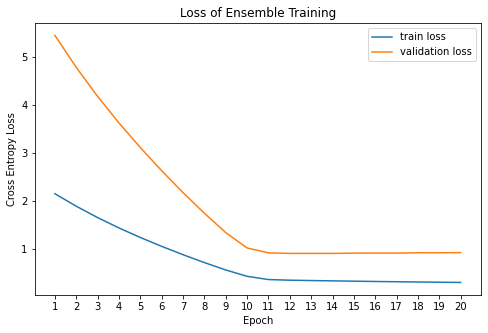

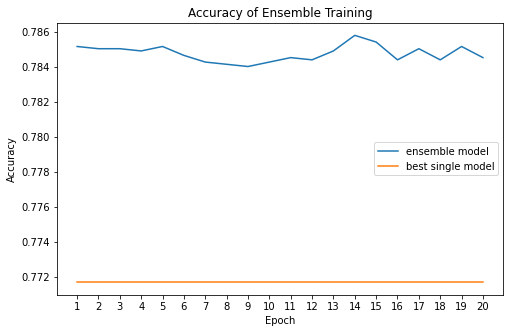

In [7]:
import matplotlib.pyplot as plt
epoch_lst = list(range(1, epochs+1))
plt.figure(figsize=(8,5))
plt.title("Loss of Ensemble Training")
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.xticks(epoch_lst)
plt.plot(epoch_lst, train_loss_lst, label='train loss')
plt.plot(epoch_lst, test_loss_lst, label = 'validation loss')
plt.legend()
plt.savefig(loss_fig_path)
plt.show()

max_val = 0.7716615698267074
plt.figure(figsize=(8,5))
plt.title("Accuracy of Ensemble Training")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epoch_lst)
plt.plot(epoch_lst, test_acc_lst, label='ensemble model')
plt.plot(epoch_lst, [max_val]*epochs, label='best single model')
plt.legend()
plt.savefig(acc_fig_path)
plt.show()